In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [19]:
df_cafe_dirty = pd.read_csv("/Users/maitanelopezsanchez/mi_proyecto-1/Datasets/dirty_cafe_sales.csv")

In [20]:
df_cafe_dirty

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


# Primera Parte
## Carga, Exploración, Limpieza y Visualización Básica de un Dataset

In [21]:
df_cafe_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [52]:
df_cafe_dirty.shape
#Tamalo del dataset: 10.000 filas y 8 columnas.

(10000, 8)

In [23]:
df_cafe_dirty.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

Python no está reconociendo el tipo de datos, en la limpieza el primer paso será asignarle el tipo correcto a cada columna. 
Transaction ID, Item, Payment Method y Location serán str. 
Quantity será un int.
Price Per Unit y Total Spent será un Float.
Y Transaction Date será en formato Time.

In [54]:
df_cafe_dirty.items

<bound method DataFrame.items of      Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2

In [25]:
df_cafe_dirty.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [51]:
df_cafe_dirty.columns
#El dataset consta de 8 columnas que sin las siguientes

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

## Calidad del Dataset

In [27]:
df_cafe_dirty.Item.unique()
#Hay 3 tipos diferentes de valores nulos, hay que unificarlos, transformarlos o eliminarlos de la forma más coherente.

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [53]:
df_cafe_dirty.Quantity.unique()
#3 tipos de valores nulos o inválidos.

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [28]:
df_cafe_dirty["Transaction ID"].value_counts()
# Al ver que la longitud es de 10.000 podemos observar que coincide con el lenght y no hay "Transaction ID" repetidos.

Transaction ID
TXN_1961373    1
TXN_4831525    1
TXN_1228927    1
TXN_6486912    1
TXN_3447069    1
              ..
TXN_5680238    1
TXN_7766134    1
TXN_2617257    1
TXN_8993132    1
TXN_6170729    1
Name: count, Length: 10000, dtype: int64

In [44]:
df_cafe_dirty['Quantity'].isna().any()
# Hay valores nulos en la columna Quantity ya que nos devuelve un True

np.True_

In [45]:
df_cafe_dirty["Item"].isna().any()
#Efectivamente hay valores nulos en la columna Item.

np.True_

In [46]:
df_cafe_dirty["Price Per Unit"].isna().any()

np.True_

In [47]:
df_cafe_dirty["Transaction Date"].isna().any()

np.True_

In [49]:
df_cafe_dirty["Payment Method"].unique() 
#3 formas de pago y 3 tipos de valores nulos

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

El Dataset ha sido extraído de una fuente fiable: Kaggle. 
El dominio del dataset parece ser ventas minoristas, ya que incluye variables como fecha, producto, cantidad vendida y método de pago.
El dataset tiene principalmente datos a nivel individual, ya que la mayoría de las filas representan transacciones específicas (como fechas, productos, cantidad, métodos de pago, etc.).
Sin embargo, incluye una columna de totales, que es el resultado de una multiplicación a partir de otras variables (cantidad * precio unitario).
Al ser la mayoría datos individuales podemos decir que el nivel de granularidad fina.


In [ ]:
#Existen valores perdidos (nulos) y este es el número de nulos que hay por columna:
df_cafe_dirty['Quantity'].isna().sum()

np.int64(138)

In [59]:
df_cafe_dirty['Item'].isna().sum()

np.int64(333)

In [60]:
df_cafe_dirty['Price Per Unit'].isna().sum()

np.int64(179)

In [61]:
df_cafe_dirty['Total Spent'].isna().sum()

np.int64(173)

In [62]:
df_cafe_dirty['Location'].isna().sum()

np.int64(3265)

In [63]:
df_cafe_dirty['Payment Method'].isna().sum()

np.int64(2579)

In [64]:
df_cafe_dirty['Transaction Date'].isna().sum()

np.int64(159)

In [65]:
#Las variables tienen una distribución razonable? ¿Existen outliers?
df_cafe_dirty.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


<Axes: >

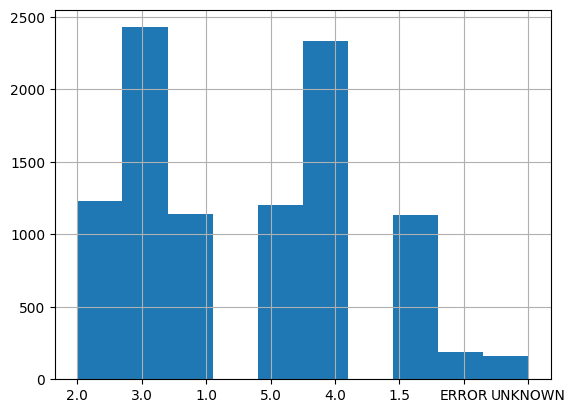

In [70]:
df_cafe_dirty['Price Per Unit'].hist()
